In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


# Scatter plot

**Task 1**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a _scatter plot_ to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

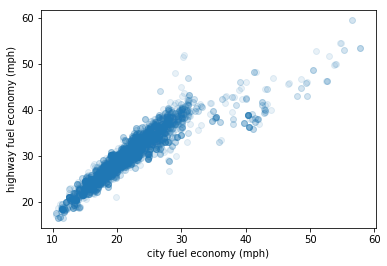

In [3]:
plt.scatter(fuel_econ.city, fuel_econ.highway, alpha=.1)
plt.xlabel('city fuel economy (mph)')
plt.ylabel('highway fuel economy (mph)')
plt.show()

Most of the cars have a city fuel economy between 10 to 30 mph in the city with a related highway fuel economy between 20 an 40 mph. For this group of cars, we see a linear relationship, with the highway fuel economy being clearly higher than the city fuel economy. We added an alpha value to our plot to mark the concentration of data. The relationship changes for cars with a city fuel economy above 35 mph. City and highway fuel economy still show a linear relationship, but the difference between both variables seems to be less pronounced.   

# Heat Map
**Task 2**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

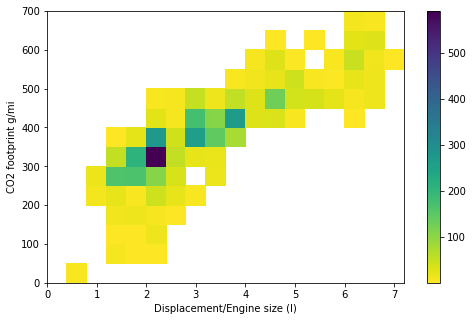

In [4]:
# heat map with bin edges
plt.figure(figsize=[8, 5])

# Create bins for rectangles
bins_x = np.arange(0, fuel_econ.displ.max()+0.4, 0.4)
bins_y = np.arange(0, fuel_econ.co2.max()+50, 50)

plt.hist2d(data=fuel_econ, x='displ', y='co2', bins=[bins_x, bins_y], cmap='viridis_r', cmin=0.5)
plt.xlabel('Displacement/Engine size (l)')
plt.ylabel('CO2 footprint g/mi')

plt.colorbar()
plt.show()

We created a heat map displaying engine size per liter and their the car's CO2 footprint in g per mile. We colored in the number occurrences of cars with a specific value combination from light to dark colors. The visualization shows that most cars fall into a positive line where the CO2 footprint increases with engine size. We find engines sized between 0.5 and 7 and CO2 emissions between 0 and 700 g/mi. Most cars fall into an engine size between 1 and 4 lites with a correlated positive relations ship of CO2 emission of 250 to 450 g/mi.        

# Violin plot
**Task:** What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). Hint: Make sure that the order of vehicle classes makes sense in your plot!

In [5]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


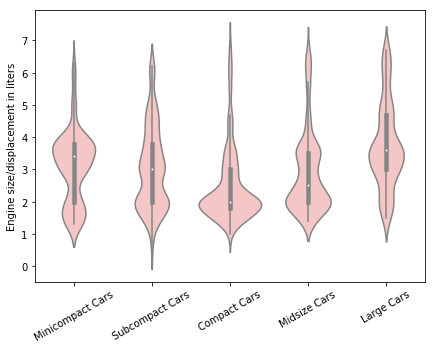

In [6]:
# order vehical classes and convert to categorical data type
sedan_classes = ["Minicompact Cars", "Subcompact Cars", "Compact Cars", "Midsize Cars", "Large Cars"]
veh_classes = pd.api.types.CategoricalDtype(ordered=True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(veh_classes)

plt.figure(figsize=[7,5])

# use one color only
base_color = sns.color_palette("RdPu", 10)[2]
sns.violinplot(data = fuel_econ, x='VClass', y='displ', color=base_color)

# style
plt.xlabel('')
plt.ylabel('Engine size/displacement in liters')
plt.xticks(rotation=30)
plt.show()

Compact cars tend to have smaller engine sizes than the minicompact and subcompact cars, even though those two vehicle sizes are smaller. The box plot would make it easier to see that the median displacement for the two smallest vehicle classes is greater than the third quartile of the compact car class.

# Clustered Bar Chart
**Task:** Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) Note: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [7]:
# create copy and only cosider main fuel types regular and premium
fuel_type_df = fuel_econ.query('(fuelType == "Premium Gasoline") | (fuelType == "Regular Gasoline")')

# order vehical classes and convert to categorical data type
sedan_classes = ["Minicompact Cars", "Subcompact Cars", "Compact Cars", "Midsize Cars", "Large Cars"]
veh_classes = pd.api.types.CategoricalDtype(ordered=True, categories = sedan_classes)
fuel_type_df['VClass'] = fuel_type_df['VClass'].astype(veh_classes)

C:\Users\marie\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


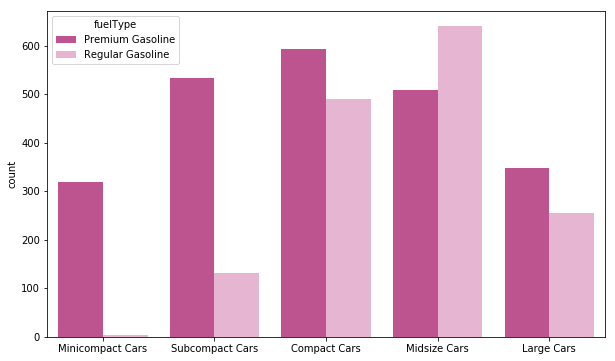

In [8]:
plt.figure(figsize=[10,6])
base_color = sns.color_palette("PiYG")

# plot clustered bar chart
ax = sns.countplot(data = fuel_type_df, x='VClass', hue="fuelType", palette=base_color)
plt.xlabel('')
plt.show()


More cars use premium gasoline compared to regular gasoline. The usage of premium gasoline is pronounced for minicompact and subcompact vehicles. Only midsize cars fuel up on regular gasoline more frequently than premium gasoline.

# Adapted Bar Charts

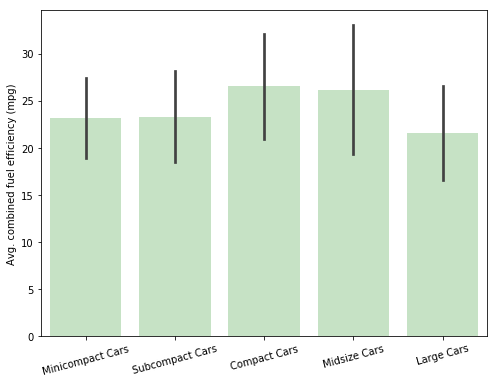

In [9]:
plt.figure(figsize=[8,6])
base_color = sns.color_palette("GnBu")[1]
sns.barplot(data = fuel_econ, x='VClass', y='comb', ci='sd', color= base_color)
plt.xlabel('')
plt.xticks(rotation=15)
plt.ylabel('Avg. combined fuel efficiency (mpg)');

# Point Plots

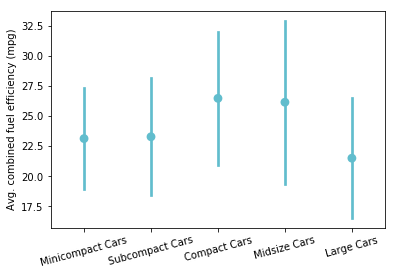

In [10]:
base_color = sns.color_palette("GnBu")[3]
sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, linestyles="", ci='sd')
plt.ylabel('Avg. value of num_var')
plt.xlabel('')
plt.xticks(rotation=15)
plt.ylabel('Avg. combined fuel efficiency (mpg)');

# Line Plots for two Quantitative Variables

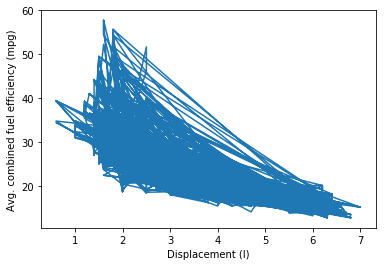

In [11]:
plt.errorbar(data = fuel_econ, x='displ', y ='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. combined fuel efficiency (mpg)');

The values are not sorted, this is why we plotted a mess. We should only have one y-value for every x-value.

In [12]:
# re-arrange values

# create bin edges x values
bins_e = np.arange(0.6, 7+0.2, 0.2)

# create bin centers to plot them in their accurate positions
# leave out the the last value, since it doesn't correspond to an actual bin center  
bins_c = bins_e[:-1] + 0.1

# Use cut function to bin values into discrete intervals to segment and sort data values into bins. 
displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)

comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()


In [13]:
# Doesn't work. no clue why...
# plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std)
# plt.xlabel('Displacement (l)')
# plt.ylabel('Avg. combined fuel efficiency (mpg)')

# Faceting
**Task 1:** Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. Hint: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [14]:
# we only want popular manufacturers with a high number of cars in to our dataset >80 cars
manufacturers = fuel_econ.make.value_counts() > 80
pop_manufacturers =[make for i, make in enumerate(manufacturers.index) if manufacturers[i]]

# create new dataframe with popular manufacturers only 
pop_fuel_econ = fuel_econ.loc[fuel_econ['make'].isin(pop_manufacturers)]

In [15]:
pop_fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


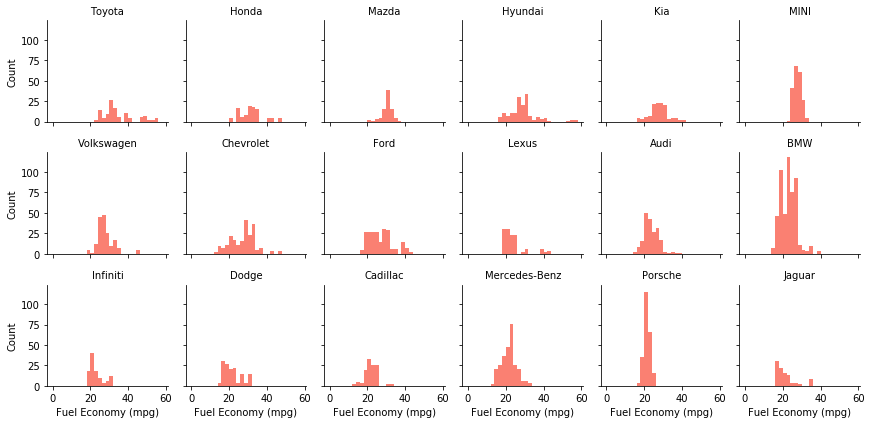

In [16]:
# calculate comb fuel economy for every make
group_means = pop_fuel_econ.groupby(['make']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index

g = sns.FacetGrid(data = pop_fuel_econ, col = 'make', 
                 col_wrap = 6, # organise into rows of 5 subplots
                 height = 2, # subplot have height of 3
                 col_order = group_order) # sorting facets by group
g.map(plt.hist, 'comb', bins = np.arange(0, fuel_econ.comb.max()+2, 2), color='salmon')
g.set_titles('{col_name}')
g.set_axis_labels("Fuel Economy (mpg)", "Count");

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.

# Adapted Bar Plot
**Task 2:** Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

C:\Users\marie\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


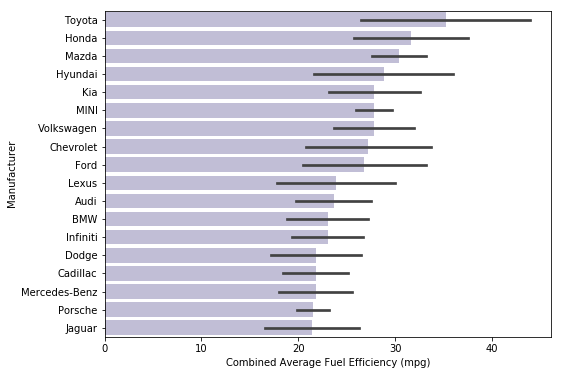

In [18]:
plt.figure(figsize=[8,6])

# plot mean fuel efficiency for each manufacturer
base_color = sns.color_palette("Set3")[2]

# Create ordering for nominal data
ordered_pop_fuel_econ = pd.api.types.CategoricalDtype(ordered = True, categories = group_order)
pop_fuel_econ['make'] = pop_fuel_econ['make'].astype(ordered_pop_fuel_econ)

sns.barplot(data = pop_fuel_econ, y = 'make', x = 'comb', color = base_color, ci="sd")

plt.ylabel('Manufacturer')
plt.xlabel('Combined Average Fuel Efficiency (mpg)');

I plotted a horizontal barplot, since there a many makes in our dataset. The error bars represent the standard deviation. Our values were ordered by average mileage. Accordingly, we see Toyota, Honda and Mazda at the top. Mercedes-Benz, Porsche and Jaguar rank low on their average combined fuel efficiency in miles per gallon. 

# Multivariate Visualizations

In [31]:
# create new column trans_type
fuel_econ['trans_type'] = fuel_econ['trans'] 
fuel_econ['trans_type'] = [ trans[:9] for trans in fuel_econ['trans']]
fuel_econ['trans_type'] = fuel_econ['trans_type'].replace(['Manual 6-', 'Manual 5-', 'Manual 7-'], 'Manual')
fuel_econ.trans_type.value_counts()


Automatic    3068
Manual        861
Name: trans_type, dtype: int64

In [32]:
# take a sample of our data set
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]
fuel_econ_subset.trans_type.value_counts()

Automatic    152
Manual        48
Name: trans_type, dtype: int64

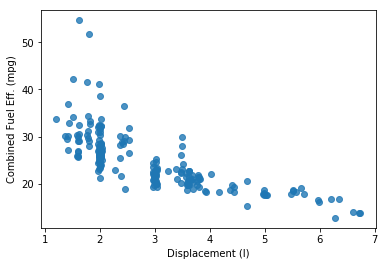

In [33]:
# add horizontal jitter
sns.regplot(data = fuel_econ_subset, x='displ', y = 'comb', x_jitter = 0.04, fit_reg = False); 
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Let's say, we'll think about analysing the engine size and it's mileage to the transmission type. Transmission type is **categorical**. Using shape as an indicator makes sense then.

## Multivariate Visualization using shape 

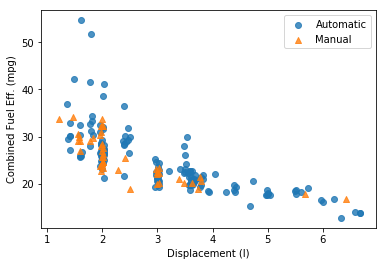

In [39]:
# create markers
ttype_markers = [['Automatic', 'o'],
                ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sns.regplot(data = plot_data, x='displ', y = 'comb', x_jitter = 0.04, fit_reg = False, marker=marker);

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']);


What if we would like to use CO2 as a 3rd variable? CO2 is numeric, so space may be a better indicator.

In [40]:
fuel_econ_subset.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
872,33923,Subaru,Impreza AWD,2014,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.5,...,96,16.7674,20.8845,22.5537,31.4599,18.9559,468,4,4,Manual
1663,35337,Hyundai,Veloster,2015,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,90,25.9773,33.7198,34.1136,49.5544,29.1006,301,7,7,Manual
2428,36881,Ford,Mustang,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,...,0,18.7011,23.4925,27.3436,38.7800,21.8020,410,5,5,Automatic
1180,34466,Porsche,911 Targa 4,2014,Minicompact Cars,4-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.4,...,0,18.3385,23.0000,25.8687,36.5000,21.1028,422,5,5,Manual
853,33852,Cadillac,XTS AWD,2014,Large Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,104,15.9536,19.8000,23.7068,33.2000,18.7067,475,4,4,Automatic


## Multivariate Visualization using size

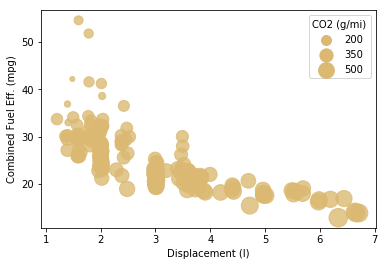

In [47]:
base_color = sns.color_palette("BrBG")[1]

# plot
sns.regplot(data = fuel_econ_subset, x='displ', y = 'comb', 
            x_jitter = 0.04, fit_reg = False,
            scatter_kws = {'s': fuel_econ_subset['co2']/2}, color = base_color); 
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Create a legend
sizes = [200,350, 500]

legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s= s/2, color = base_color))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');